In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functools

In [2]:
df=pd.read_csv("DUK_dividend.csv",parse_dates=['Date'],index_col=0)
df=df[df.index>='1/1/2008']
df_nextera=pd.read_csv("NEE_dividend.csv",parse_dates=['Date'],index_col=0)
df_nextera=df_nextera[df_nextera.index>='1/1/2008']
df_xel=pd.read_csv("XEL_dividend.csv",parse_dates=['Date'],index_col=0)
df_xel=df_xel[df_xel.index>='1/1/2008']

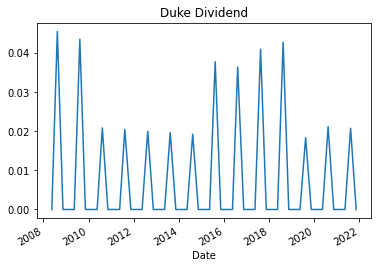

In [3]:
portfolio_returns=df['Dividends'].pct_change()
portfolio_returns.plot()
plt.title("Duke Dividend")
plt.show()
#covariance = portfolio_returns.cov()*4

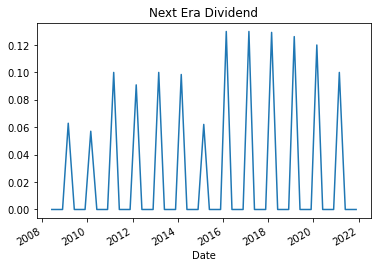

In [4]:
portfolio_returns_nextera=df_nextera['Dividends'].pct_change()
plt.title("Next Era Dividend")
portfolio_returns_nextera.plot()
plt.show()

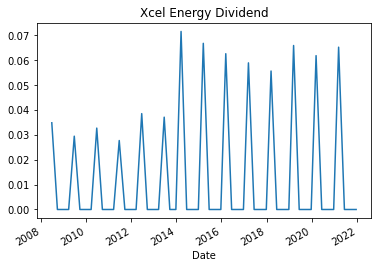

In [5]:
portfolio_returns_xel=df_xel['Dividends'].pct_change()
plt.title("Xcel Energy Dividend")
portfolio_returns_xel.plot()
plt.show()

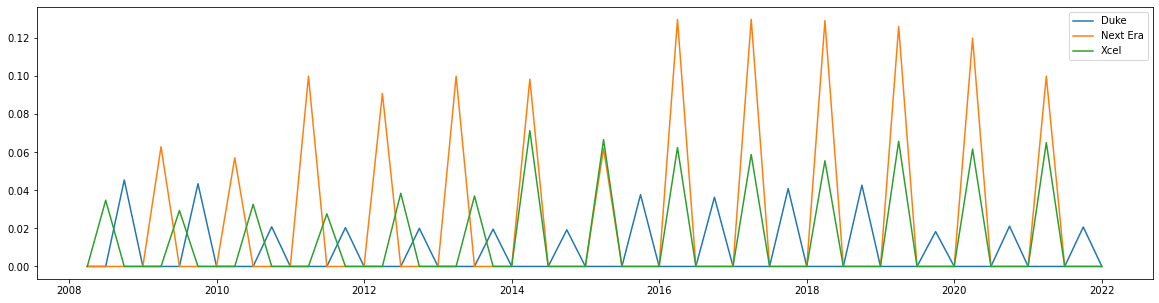

In [6]:
portfolio_returns_duke2=portfolio_returns.resample('Q').sum().reset_index()
portfolio_returns_nee2=portfolio_returns_nextera.resample('Q').sum().reset_index()
portfolio_returns_xel2=portfolio_returns_xel.resample('Q').sum().reset_index()

dfs=[portfolio_returns_duke2,portfolio_returns_nee2,portfolio_returns_xel2]

df_final = functools.reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs)
df_final.set_index("Date",inplace=True)
df_final=df_final.rename(columns={"Dividends_x":"Dividends_duke","Dividends_y":"Dividends_nee","Dividends": "Dividends_xel"})
#print(df_final)
fig,ax=plt.subplots(figsize=(20,5))
ax.plot(df_final.index,df_final[['Dividends_duke','Dividends_nee','Dividends_xel']],label=['Duke','Next Era','Xcel'])
plt.legend()
plt.show()

#portfolio_returns_combined=pd.merge(portfolio_returns_duke2,portfolio_returns_nee2,suffixes=("_duke", "_nee"),on="Date")
#portfolio_returns_combined=pd.merge(portfolio_returns_duke2,portfolio_returns_xel2,suffixes=("_duke", "_xel"),on="Date")

#fig,ax=plt.subplots(figsize=(20,5))

#ax.plot(portfolio_returns_combined2.index,portfolio_returns_combined2[['Dividends_duke','Dividends_nee']])

#y1=portfolio_returns_combined2['Dividends_duke']
#y2=portfolio_returns_combined2['Dividends_nee']
#y3=portfolio_returns_combined2['Dividends_xel']

#plt.bar(x, y1, color='r')
#plt.bar(x, y2, bottom=y1, color='b')
#plt.bar(x, y3, bottom=y1+y2, color='y')

#plt.stackplot(portfolio_returns_combined.index,portfolio_returns_combined['Dividends_duke'],portfolio_returns_combined['Dividends_nee'],colors=['green','blue'])
#plt.show()




In [7]:
def correlation(x, y):
    n = len(x)
    x_mean = sum(x) / n
    y_mean = sum(y) / n
    x_deviation = [i - x_mean for i in x]
    y_deviation = [i - y_mean for i in y]
    xy_deviation = [x_deviation[i] * y_deviation[i] for i in range(n)]
    x_deviation_sqr = [i ** 2 for i in x_deviation]
    y_deviation_sqr = [i ** 2 for i in y_deviation]
    r = sum(xy_deviation) / (sum(x_deviation_sqr) * sum(y_deviation_sqr)) ** 0.5
    return r

#print(portfolio_returns_combined.columns)
print(correlation(df_final['Dividends_duke'],df_final['Dividends_nee']))

-0.28079491416639907


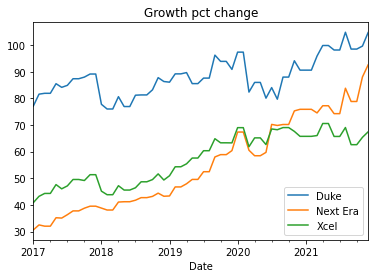

In [20]:
duke_df = pd.read_csv("DUK.csv",parse_dates=['Date'],index_col=0)
duke_df=duke_df[duke_df.index>='1/1/2017']
nee_df =pd.read_csv("NEE.csv",parse_dates=['Date'],index_col=0)
nee_df=nee_df[nee_df.index>='1/1/2017']
xel_df =pd.read_csv("XEL.csv",parse_dates=['Date'],index_col=0)
xel_df=xel_df[xel_df.index>='1/1/2017']

def stock_price_by_pct_chg(df):

    first_price=df['Open'].iloc[0]
    returns=df['Open'].pct_change()
    returns_plus_one = returns.add(1)
    accumulative=returns_plus_one.cumprod()
    accumulative=accumulative.mul(first_price)
    return accumulative


duke_accumulative=stock_price_by_pct_chg(duke_df)
nee_accumulative=stock_price_by_pct_chg(nee_df)
xel_accumulative=stock_price_by_pct_chg(xel_df)


duke_accumulative.asfreq('M').ffill().plot(label='Duke')
nee_accumulative.asfreq('M').ffill().plot(label='Next Era')
xel_accumulative.asfreq('M').ffill().plot(label='Xcel')

plt.title('Growth pct change' )
plt.legend()
plt.show()

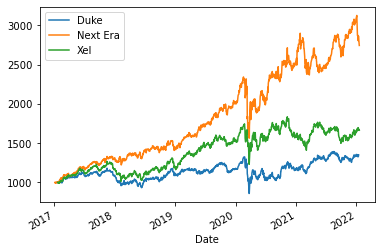

In [28]:
investment=1000

def valuation(df):
    df_returns=df['Open'].pct_change()
    df_returns_plus_one = df_returns.add(1)
    df_cumulative_return = df_returns_plus_one.cumprod()
    return df_cumulative_return.mul(investment)

val=valuation(duke_df)
val.plot(label="Duke")
val=valuation(nee_df)
val.plot(label="Next Era")
val=valuation(xel_df)
val.plot(label="Xel")
plt.legend()
plt.show()